In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

# Download NLTK data files (if not already installed)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
df= pd.read_csv("Nazario_5.csv")
df.head()

sender  \
0                 "Hu, Sylvia" <Sylvia.Hu@ENRON.com>   
1                   "Webb, Jay" <Jay.Webb@ENRON.com>   
2               "Symms, Mark" <Mark.Symms@ENRON.com>   
3             "Thorne, Judy" <Judy.Thorne@ENRON.com>   
4  "Williams, Jason R (Credit)" <Jason.R.Williams...   

                                            receiver  \
0  "Acevedo, Felecia" <Felecia.Acevedo@ENRON.com>...   
1           "Lambie, Chris" <Chris.Lambie@ENRON.com>   
2        "Thomas, Paul D." <Paul.D.Thomas@ENRON.com>   
3  "Grass, John" <John.Grass@ENRON.com>, "Nemec, ...   
4  "Nemec, Gerald" <Gerald.Nemec@ENRON.com>, "Dic...   

                              date  \
0  Fri, 29 Jun 2001 08:36:09 -0500   
1  Fri, 29 Jun 2001 09:37:04 -0500   
2  Fri, 29 Jun 2001 08:39:30 -0500   
3  Fri, 29 Jun 2001 10:35:17 -0500   
4  Fri, 29 Jun 2001 10:40:02 -0500   

                                       subject  \
0  FW: June 29 -- BNA, Inc. Daily Labor Report   
1                           NGX failover plan.   
2                            RE: Intranet Site   
3         FW: ENA Upstream Company information   
4                          New Master Physical   

                                                body  label  \
0  User ID:  enrondlr\nPW:        bnaweb22\n\n\n ...      0   
1  \nHi Chris,  \n\nTonight we are rolling out a ...      0   
2  Rika r these new?\n\n -----Original Message---...      0   
3  John/Gerald,\n\nWe are currently trading under...      0   
4  Gerald and Stacy -\n\nAttached is a worksheet ...      0   

                                                urls  
0  ['http://web.bna.com', 'http://pubs.bna.com/ip...  
1                                                 []  
2  ['http://eastpower.dev.corp.enron.com/summary/...  
3                                                 []  
4                                                 []

In [41]:
filtered_df = df[df['label'] == 1]

# Select the first 10 records
print(filtered_df['body'][1500])

This text is part of the internal format of your mail folder, and is not a real message.  It is created automatically by the mail system software. If deleted, important folder data will be lost, and it will be re-created with the data reset to initial values. From 125117@ihp-osb-lngweb5.ihp.iinet.net.au  Fri Jan  2 07:19:00 2015 Return-Path: <125117@ihp-osb-lngweb5.ihp.iinet.net.au> X-Original-To: jose@login.monkey.org Delivered-To: jose@login.monkey.org Received: from forward.b.hostedemail.com (forward.b.hostedemail.com [64.98.36.17]) 	by l.monkey.org (Postfix) with ESMTP id 180E6F4007 	for ; Fri,  2 Jan 2015 07:19:00 -0600 (CST) Received: from smtpin10.hostedemail.com (10.5.19.251.rfc1918.com [10.5.19.251]) 	by ofarelay01.b.hostedemail.com (Postfix) with SMTP id 6E3BF34E368 	for ; Fri,  2 Jan 2015 13:18:59 +0000 (UTC) X-Forwarded-For: jose@monkey.org by Hostedemail Delivered-To: jose@monkey.org X-FDA: 69706560798.10.water55_6b398d6d93b0f Authentication-Results: auth.b.hostedemail.com

sender  \
0  Mail System Internal Data <MAILER-DAEMON@monke...   
1                        cPanel <service@cpanel.com>   
2    Microsoft Outlook <recepcao@unimedceara.com.br>   
3                     Ann Garcia <AnGarcia@mcoe.org>   
4                 "USAA" <usaaacctupdate@sccu4u.com>   

                                 receiver  \
0                                     NaN   
1                         jose@monkey.org   
2                                     NaN   
3     "info@maaaaa.org" <info@maaaaa.org>   
4  Recipients <usaaacctupdate@sccu4u.com>   

                                    date  \
0             28 Sep 2017 09:57:25 -0400   
1        Fri, 30 Oct 2015 00:00:48 -0500   
2  Fri, 30 Oct 2015 06:21:59 -0300 (BRT)   
3        Fri, 30 Oct 2015 14:54:33 +0000   
4        Fri, 30 Oct 2015 14:02:33 -0500   

                                             subject  \
0  DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA   
1                                Verify Your Account   
2                          Helpdesk Mailbox Alert!!!   
3                               IT-Service Help Desk   
4      Final USAA Reminder - Update Your Account Now   

                                                body  urls  label  
0  This text is part of the internal format of yo...     1      1  
1  Business with  \t\t\t\t\t\t\t\tcPanel & WHM \t...     1      1  
2  Your two incoming mails were placed on pending...     1      1  
3  Password will expire in 3 days. Click Here To ...     0      1  
4  To ensure delivery to your inbox, please add U...     1      1

sender        2
receiver    113
date          3
subject      50
body          0
label         0
urls          0
dtype: int64
label
1    1565
0    1500
Name: count, dtype: int64


c:\Users\Rohan\.conda\envs\gpuTraining\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rohan\.conda\envs\gpuTraining\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rohan\.conda\envs\gpuTraining\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


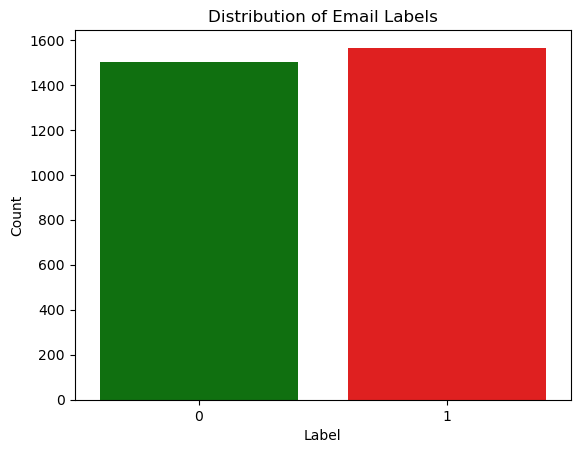

In [25]:
df.shape

# Check for missing values
print(df.isnull().sum())


# Distribution of labels
label_counts = df['label'].value_counts()
print(label_counts)

# Plot the distribution of labels
sns.countplot(x='label', data=df, palette={0: 'green', 1: 'red'})
plt.title('Distribution of Email Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [26]:
# Fill missing values in the subject column with an empty string
df['subject'].fillna('', inplace=True)

# Combine the subject and body into a single column named content
df['content'] = df['subject'] + ' ' + df['body']

# Drop all other columns except label and content
df = df[['label', 'content']]

stop_words = set(stopwords.words('english'))

# Function to clean the text data
def clean_text(text):

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Replace URLs with the word URL_found
    text = re.sub(r'http\S+|www\S+|https\S+', 'URLfound', text, flags=re.MULTILINE)
    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

# Apply the clean_text function to the content column
df['content'] = df['content'].apply(clean_text)

# Display the first few rows of the cleaned dataframe
print(df.head())

   label                                            content
0      0  fw june 29 bna inc daily labor report user id ...
1      0  ngx failover plan hi chris tonight rolling new...
2      0  intranet site rika r new original message thom...
3      0  fw ena upstream company information johngerald...
4      0  new master physical gerald stacy attached work...


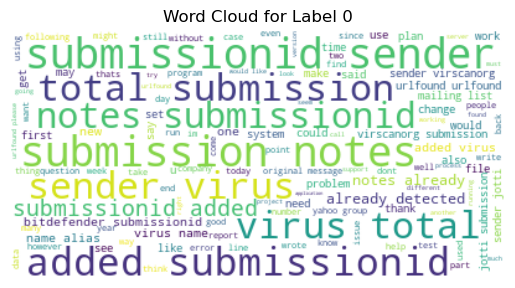

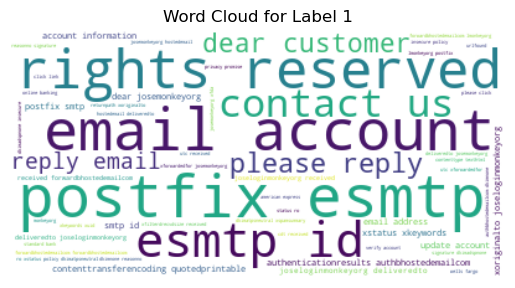

In [27]:
# Generate word clouds for each label
def plot_word_cloud(label):
    text = " ".join(review for review in df[df['label'] == label]['content'])
    word_cloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Label {label}")
    plt.show()

plot_word_cloud(0)  # Legitimate emails
plot_word_cloud(1)  # Phishing emails


In [ ]:
# Combine subject and body into a single feature
df['text'] = df['subject'] + ' ' + df['body']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X_tfidf = tfidf.fit_transform(df['text'])

# Convert to DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print(X_tfidf_df.head())


In [ ]:
# Get the most common words for each label
def get_most_common_words(label, n=20):
    text = " ".join(review for review in df[df['label'] == label]['body'])
    words = text.split()
    word_freq = nltk.FreqDist(words)
    common_words = word_freq.most_common(n)
    return common_words

common_words_legit = get_most_common_words(0)
common_words_phish = get_most_common_words(1)

# Plot the most common words
def plot_common_words(common_words, label):
    words, counts = zip(*common_words)
    plt.barh(words, counts)
    plt.title(f'Most Common Words in Label {label} Emails')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

plot_common_words(common_words_legit, 0)
plot_common_words(common_words_phish, 1)


In [ ]:
# Calculate the length of the emails
df['email_length'] = df['text'].apply(len)

# Plot the distribution of email lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='email_length', hue='label', element='step', stat='density', common_norm=False)
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Density')
plt.show()
